In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

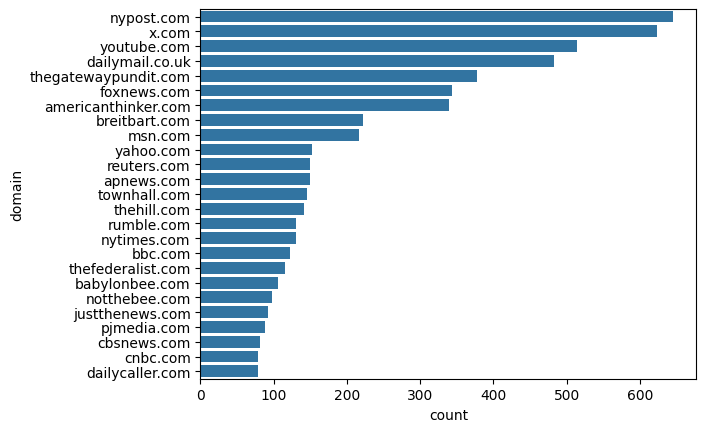

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

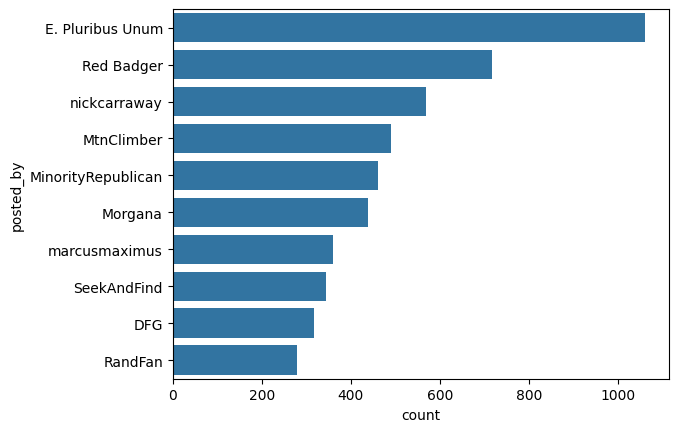

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_80432/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain                               \
                                         count unique                   top   
domain               posted_by                                                
americanthinker.com  DFG                     1      1   americanthinker.com   
                     E. Pluribus Unum       76      1   americanthinker.com   
                     MtnClimber            179      1   americanthinker.com   
                     SeekAndFind            45      1   americanthinker.com   
apnews.com           DFG                     2      1            apnews.com   
                     E. Pluribus Unum       77      1            apnews.com   
                     SeekAndFind             3      1            apnews.com   
                     MinorityRepublican      7      1            apnews.com   
                     Morgana                 1      1            apnews.com   
                     marcusmaximus           1      1            apnews.com   
                     nickcarraway            2      1            apnews.com   
babylonbee.com       DFG                    27      1        babylonbee.com   
                     E. Pluribus Unum       16      1        babylonbee.com   
                     marcusmaximus           1      1        babylonbee.com   
bbc.com              DFG                     2      1               bbc.com   
                     E. Pluribus Unum       14      1               bbc.com   
                     SeekAndFind             3      1               bbc.com   
                     MinorityRepublican     23      1               bbc.com   
                     Morgana                 1      1               bbc.com   
                     marcusmaximus           5      1               bbc.com   
                     nickcarraway            8      1               bbc.com   
                     Red Badger              1      1               bbc.com   
breitbart.com        DFG                    12      1         breitbart.com   
                     MinorityRepublican      7      1         breitbart.com   
                     Morgana                21      1         breitbart.com   
                     nickcarraway            2      1         breitbart.com   
                     Red Badger             28      1         breitbart.com   
cbsnews.com          DFG                     1      1           cbsnews.com   
                     E. Pluribus Unum        1      1           cbsnews.com   
                     SeekAndFind             3      1           cbsnews.com   
                     MinorityRepublican      9      1           cbsnews.com   
                     Morgana                 1      1           cbsnews.com   
                     marcusmaximus           4      1           cbsnews.com   
                     nickcarraway           15      1           cbsnews.com   
                     Red Badger              4      1           cbsnews.com   
cnbc.com             DFG                     4      1              cnbc.com   
                     E. Pluribus Unum        4      1              cnbc.com   
                     SeekAndFind             6      1              cnbc.com   
                     MinorityRepublican      2      1              cnbc.com   
                     marcusmaximus           1      1              cnbc.com   
                     nickcarraway            1      1              cnbc.com   
                     Red Badger             18      1              cnbc.com   
                     RandFan                 3      1              cnbc.com   
dailycaller.com      DFG                    13      1       dailycaller.com   
                     SeekAndFind             1      1       dailycaller.com   
                     MinorityRepublican      3      1       dailycaller.com   
                     marcusmaximus           1      1       dailycaller.com   
                     nickcarraway            2      1       dailycaller.com   
           

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_80432/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
Charlie Kirk shot at Utah event,2025-09-10 19:43:50,417.0
"Tyler Robinson, 22-year-old from Utah, ID’d as Charlie Kirk shooting suspect after father ‘turned him in’ — Trump: ‘We have him’",2025-09-12 15:12:44,321.0
BREAKING: The subject for the horrific shooting today that took the life of Charlie Kirk is now in custody.,2025-09-11 00:41:10,301.0
"🚨🚨🚨🚨#BREAKING FBI Director Kash Patel, Utah Governor Spencer Cox and other top officials will hold a press conference at 9:30 pm ET",2025-09-12 03:11:30,262.0
"Tyler Robinson ‘full of hate’ before Charlie Kirk shooting, says family friends — while ‘Hey fascist! Catch!’ found written on bullets",2025-09-12 15:58:35,238.0
"Trump posts on truth, social in defensive Pam Bondi: What’s going on with my “boys” and, in some cases, “gals?” They’re all going after Attorney General Pam Bondi",2025-07-13 02:43:53,228.0
TRUMP ISSUES MESSAGE OF TOTAL SUPPORT FOR PAM BONDI,2025-07-13 00:38:41,214.0
Favorite Boy Or Girl Name Songs.Tell us your Favorites.Freeper Canteen 7~11~25,2025-07-11 03:34:25,190.0
“They’re Coming Out of the Woodwork!” Whistleblowers Who Helped Craft Obama-Brennan’s Phony Russia Report Are Turning Over Affidavits to DOJ,2025-07-21 00:03:11,172.0
